## <center> Exploring Texas Housing Data

## About Data
Throughout the next few exercises, we’ll examine some data about Texas housing rentals on Craigslist — an online classifieds site. The data dictionary is as follows:

- **price:** monthly rental price in U.S.D.
- **type:** type of housing (eg., 'apartment', 'house', 'condo', etc.)
- **sqfeet:** housing area, in square feet
- **beds:** number of beds
- **baths:** number of baths
- **lat:** latitude
- **long:** longitude

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Introduction

#####  Exercise 1
Load the data and use the ``.head()`` method to print the first 10 rows and inspect some more of the data.<br>
What are some other quantitative variables that might be related to each other?

In [4]:
housing = pd.read_csv("housing_sample.csv")
housing.head(10)
# I think price and sqfeet related to each other...

,price,type,sqfeet,beds,baths,lat,long
0,615,apartment,364,0,1.0,35.1653,-101.8840
1,1346,apartment,816,1,1.0,32.9865,-96.6860
2,900,apartment,500,1,1.0,30.2355,-97.7292
3,650,apartment,700,1,1.0,26.1923,-98.2657
4,1330,apartment,1040,2,2.0,30.6380,-96.2940
5,915,apartment,620,1,1.0,29.8754,-97.9404
6,1600,house,1578,3,2.0,32.6412,-97.1058
7,349,apartment,275,0,1.0,33.5865,-101.8610
8,695,house,650,1,1.0,31.5525,-97.1604
9,889,apartment,650,1,1.5,29.8754,-97.9404


## Scatter Plots
One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot.<br> 
This makes it easy to look for patterns or trends in the data.

##### Exercise 2
Create a scatter plot to see if there is an association between the area (`sqfeet`) of a rental and the number of bedrooms (`beds`). <br>
Do you think these variables are associated? If so, is the relationship what you expected?

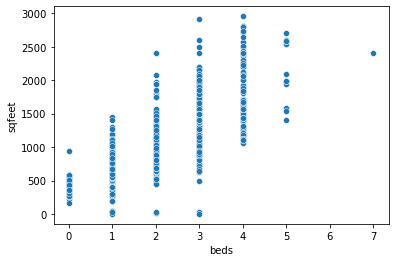

In [9]:
sns.scatterplot(data=housing, x="beds", y="sqfeet");
# Yes these variables are associated and the relationship is what I expected.

## Exploring Covariance
Beyond visualizing relationships, we can also use summary statistics to quantify the strength of certain associations.<br>
Covariance is a summary statistic that describes the strength of a linear relationship.<br> 
A linear relationship is one where a straight line would best describe the pattern of points in a scatter plot.

Covariance can range from negative infinity to positive infinity. <br>
A positive covariance indicates that a larger value of one variable is associated with a larger value of the other.<br> 
A negative covariance indicates a larger value of one variable is associated with a smaller value of the other.<br> 
A covariance of 0 indicates no linear relationship. 

##### Exercise 3
Use the ``cov()`` function from NumPy to calculate the covariance matrix for the `sqfeet` variable and the `beds` variable.<br>
Save the covariance matrix as `cov_mat_sqfeet_beds`. <br>
Print out the value stored in the variable `cov_mat_sqfeet_beds`.

In [11]:
cov_mat_sqfeet_beds = np.cov(housing["sqfeet"], housing["beds"])
cov_mat_sqfeet_beds

array([[1.10668978e+05, 2.28223306e+02],
       [2.28223306e+02, 7.24471949e-01]])

##### Exercise 4
Look at the covariance matrix you just printed and find the covariance of sqfeet and beds. Save that number as a variable named `cov_sqfeet_beds`.

In [16]:
cov_sqfeet_beds = cov_mat_sqfeet_beds[0,1]
cov_sqfeet_beds
# There is a positive covariance

228.22330619405946

## Exploring Correlation Part-1
Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance.<br>
It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.<br>

Highly associated variables with a positive linear relationship will have a correlation close to 1.<br>
Highly associated variables with a negative linear relationship will have a correlation close to -1. <br>
Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

Generally, a correlation larger than about ``.3`` indicates a ``linear`` association.<br>
A correlation greater than about ``.6`` suggestions a ``strong linear`` association`

##### Exercise 5
Use the `pearsonr` function from ``scipy.stats`` to calculate the correlation between ``sqfeet`` and ``beds``.<br>
Store the result in a variable ``named corr_sqfeet_beds`` and print out the result.<br>
How strong is the linear association between these variables?

In [20]:
corr_sqfeet_beds  = stats.pearsonr(housing["sqfeet"], housing["beds"])[0]
corr_sqfeet_beds
# There is strong linear association between sqfeet and beds.

0.8060022524416223

##### Exercise 6
Generate a scatter plot of `sqfeet` and `beds` again. Does the correlation value make sense?

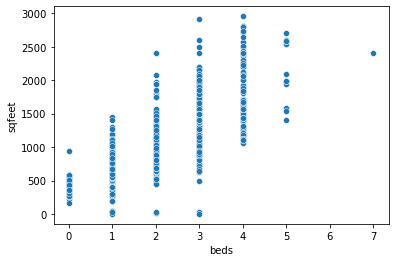

In [22]:
sns.scatterplot(data=housing, x="beds", y="sqfeet");

## Exploring Correlation Part-2
It’s important to note that there are some limitations to using correlation or covariance as a way of assessing whether there is an association between two variables. <br>
Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

##### Exercise 7
Load the dataset `sleep_performance.csv` and save as `sleep`. The hypothetical data contains two columns:
- **hours_sleep:** the number of hours that a person slept
- **performance:** that person’s performance score on a physical task the next day

In [24]:
sleep = pd.read_csv("sleep_performance.csv")
sleep.head(2)

,hours_sleep,performance
0,7.3,9.3
1,8.3,9.9


##### Exercise 8
Create a scatter plot of `hours_sleep` (on the x-axis) and `performance` (on the y-axis). What is the relationship between these variables?

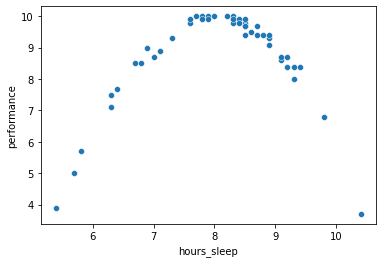

More sleep appears to be associated with higher performance,
up to about eight hours, after which more sleep is associated with poorer performance.


In [29]:
sns.scatterplot(data=sleep, x="hours_sleep", y="performance")
plt.show()
print("""More sleep appears to be associated with higher performance,
up to about eight hours, after which more sleep is associated with poorer performance.""")

##### Exercise 9
Calculate the correlation for `hours_sleep` and `performance` and save the result as `corr_sleep_performance`.<br> 
Then, print out `corr_sleep_performance`. Does the correlation accurately reflect the strength of the relationship between these variables?

In [34]:
corr_sleep_performance = stats.pearsonr(sleep["hours_sleep"], sleep["performance"])

In [35]:
print(f"Correlation coefficient: {corr_sleep_performance[0]}, p-value: {corr_sleep_performance[1]}")

Correlation coefficient: 0.2814978189049413, p-value: 0.0476593612399499


In [33]:
print("""The correlation is only 0.28 (a relatively small correlation), 
even though the variables seem to be clearly associated (there is a very clear pattern in the scatter plot).""")

The correlation is only 0.28 (a relatively small correlation), 
even though the variables seem to be clearly associated (there is a very clear pattern in the scatter plot).
